# Problem Statement

Conduct an extensive analysis of Audible's historical audiobook sales data spanning from the year 2000 to 2023, followed by the development of advanced machine learning models using Python. The primary objectives are to gain insights into long-term sales trends, assess the impact of historical events on audiobook consumption, and leverage this knowledge to create predictive models that can forecast future sales, identify potential bestselling titles, and optimize marketing strategies to maximize revenue.

# Import essential packages

In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# for model creation and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Import the csv file

In [2]:
Df = pd.read_csv('audible_uncleaned.csv')
pd.set_option('display.max_columns',None)
Df

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,Writtenby:ChrisStewart,Narratedby:ChrisStewart,7 hrs and 34 mins,09-03-17,English,Not rated yet,596.00
87485,The Alps,Writtenby:StephenO'Shea,Narratedby:RobertFass,10 hrs and 7 mins,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,Writtenby:MarkTwain,Narratedby:FloGibson,19 hrs and 4 mins,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,Writtenby:LaurenceSterne,Narratedby:AntonLesser,4 hrs and 8 mins,23-02-11,English,Not rated yet,680.00


# Data Cleansing

In [3]:
Df['author'] = Df['author'].str.replace(r'^Writtenby:', '', regex=True)
Df['narrator'] = Df['narrator'].str.replace(r'^Narratedby:', '', regex=True)
Df

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,7 hrs and 34 mins,09-03-17,English,Not rated yet,596.00
87485,The Alps,StephenO'Shea,RobertFass,10 hrs and 7 mins,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,MarkTwain,FloGibson,19 hrs and 4 mins,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,4 hrs and 8 mins,23-02-11,English,Not rated yet,680.00


In [4]:
# Function to convert time strings to minutes
def convert_time_to_minutes(time_str):
    try:
        total_minutes = 0
        # Split the string by spaces
        parts = time_str.split()
        for i in range(len(parts)):
            if parts[i].isdigit():
                if i < len(parts) - 1:
                    if parts[i + 1].lower() in ('hour', 'hours', 'hr', 'hrs'):
                        total_minutes += int(parts[i]) * 60
                    elif parts[i + 1].lower() in ('minute', 'minutes', 'min', 'mins'):
                        total_minutes += int(parts[i])
                else:
                    total_minutes += int(parts[i])
        return total_minutes
    except:
        return None

# Apply the function to the entire 'time' column in the DataFrame
Df['time'] = Df['time'].apply(convert_time_to_minutes)

# Rename the column to 'time_in_minutes'
Df.rename(columns={'time': 'time_in_minutes'}, inplace=True)

# Display the updated DataFrame
Df


,name,author,narrator,time_in_minutes,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,140,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,788,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,123,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,676,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,600,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,454,09-03-17,English,Not rated yet,596.00
87485,The Alps,StephenO'Shea,RobertFass,607,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,MarkTwain,FloGibson,1144,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,248,23-02-11,English,Not rated yet,680.00


In [5]:
def year_change_format(date_string):
    
    day,month,year = date_string.split('-')
    year = '20'+year
    new_date_str = f"{year}"
    
    return new_date_str

Df['releasedate'] = Df['releasedate'].apply(year_change_format)
Df
    

,name,author,narrator,time_in_minutes,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,140,2008,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,788,2018,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,123,2020,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,676,2021,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,600,2010,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,454,2017,English,Not rated yet,596.00
87485,The Alps,StephenO'Shea,RobertFass,607,2017,English,Not rated yet,820.00
87486,The Innocents Abroad,MarkTwain,FloGibson,1144,2016,English,Not rated yet,938.00
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,248,2011,English,Not rated yet,680.00


In [6]:
Df['stars'] = Df['stars'].replace(['Not rated yet'],0)
Df

,name,author,narrator,time_in_minutes,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,140,2008,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,788,2018,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,123,2020,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,676,2021,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,600,2010,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,454,2017,English,0,596.00
87485,The Alps,StephenO'Shea,RobertFass,607,2017,English,0,820.00
87486,The Innocents Abroad,MarkTwain,FloGibson,1144,2016,English,0,938.00
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,248,2011,English,0,680.00


In [7]:
# Extract the values before " out of "
Df['stars_'] = Df['stars'].str.extract(r'([\d.]+) out of')

# Convert the extracted values to float
Df['star_rating'] = Df['stars_'].astype(float)

# Display the updated DataFrame
Df


,name,author,narrator,time_in_minutes,releasedate,language,stars,price,stars_,star_rating
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,140,2008,English,5 out of 5 stars34 ratings,468.00,5,5.0
1,The Burning Maze,RickRiordan,RobbieDaymond,788,2018,English,4.5 out of 5 stars41 ratings,820.00,4.5,4.5
2,The Deep End,JeffKinney,DanRussell,123,2020,English,4.5 out of 5 stars38 ratings,410.00,4.5,4.5
3,Daughter of the Deep,RickRiordan,SoneelaNankani,676,2021,English,4.5 out of 5 stars12 ratings,615.00,4.5,4.5
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,600,2010,English,4.5 out of 5 stars181 ratings,820.00,4.5,4.5
...,...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,454,2017,English,0,596.00,NaN,NaN
87485,The Alps,StephenO'Shea,RobertFass,607,2017,English,0,820.00,NaN,NaN
87486,The Innocents Abroad,MarkTwain,FloGibson,1144,2016,English,0,938.00,NaN,NaN
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,248,2011,English,0,680.00,NaN,NaN


In [8]:
Df.star_rating.fillna(0,inplace=True)

In [9]:
Df.drop(columns='stars_',inplace=True,axis=1)

In [10]:
Df

,name,author,narrator,time_in_minutes,releasedate,language,stars,price,star_rating
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,140,2008,English,5 out of 5 stars34 ratings,468.00,5.0
1,The Burning Maze,RickRiordan,RobbieDaymond,788,2018,English,4.5 out of 5 stars41 ratings,820.00,4.5
2,The Deep End,JeffKinney,DanRussell,123,2020,English,4.5 out of 5 stars38 ratings,410.00,4.5
3,Daughter of the Deep,RickRiordan,SoneelaNankani,676,2021,English,4.5 out of 5 stars12 ratings,615.00,4.5
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,600,2010,English,4.5 out of 5 stars181 ratings,820.00,4.5
...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,454,2017,English,0,596.00,0.0
87485,The Alps,StephenO'Shea,RobertFass,607,2017,English,0,820.00,0.0
87486,The Innocents Abroad,MarkTwain,FloGibson,1144,2016,English,0,938.00,0.0
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,248,2011,English,0,680.00,0.0


In [11]:
# Extract the values after "out of 5 stars" and convert to integers
Df['num_of_reviews'] = Df['stars'].str.extract(r'out of 5 stars(\d+) ratings').astype(str)
Df

,name,author,narrator,time_in_minutes,releasedate,language,stars,price,star_rating,num_of_reviews
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,140,2008,English,5 out of 5 stars34 ratings,468.00,5.0,34
1,The Burning Maze,RickRiordan,RobbieDaymond,788,2018,English,4.5 out of 5 stars41 ratings,820.00,4.5,41
2,The Deep End,JeffKinney,DanRussell,123,2020,English,4.5 out of 5 stars38 ratings,410.00,4.5,38
3,Daughter of the Deep,RickRiordan,SoneelaNankani,676,2021,English,4.5 out of 5 stars12 ratings,615.00,4.5,12
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,600,2010,English,4.5 out of 5 stars181 ratings,820.00,4.5,181
...,...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,454,2017,English,0,596.00,0.0,nan
87485,The Alps,StephenO'Shea,RobertFass,607,2017,English,0,820.00,0.0,nan
87486,The Innocents Abroad,MarkTwain,FloGibson,1144,2016,English,0,938.00,0.0,nan
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,248,2011,English,0,680.00,0.0,nan


In [12]:
Df['num_of_reviews'] = Df['num_of_reviews'].replace(['nan'],0)
Df

,name,author,narrator,time_in_minutes,releasedate,language,stars,price,star_rating,num_of_reviews
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,140,2008,English,5 out of 5 stars34 ratings,468.00,5.0,34
1,The Burning Maze,RickRiordan,RobbieDaymond,788,2018,English,4.5 out of 5 stars41 ratings,820.00,4.5,41
2,The Deep End,JeffKinney,DanRussell,123,2020,English,4.5 out of 5 stars38 ratings,410.00,4.5,38
3,Daughter of the Deep,RickRiordan,SoneelaNankani,676,2021,English,4.5 out of 5 stars12 ratings,615.00,4.5,12
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,600,2010,English,4.5 out of 5 stars181 ratings,820.00,4.5,181
...,...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,454,2017,English,0,596.00,0.0,0
87485,The Alps,StephenO'Shea,RobertFass,607,2017,English,0,820.00,0.0,0
87486,The Innocents Abroad,MarkTwain,FloGibson,1144,2016,English,0,938.00,0.0,0
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,248,2011,English,0,680.00,0.0,0


In [13]:
Df.drop(columns='stars',inplace=True)
Df

,name,author,narrator,time_in_minutes,releasedate,language,price,star_rating,num_of_reviews
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,140,2008,English,468.00,5.0,34
1,The Burning Maze,RickRiordan,RobbieDaymond,788,2018,English,820.00,4.5,41
2,The Deep End,JeffKinney,DanRussell,123,2020,English,410.00,4.5,38
3,Daughter of the Deep,RickRiordan,SoneelaNankani,676,2021,English,615.00,4.5,12
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,600,2010,English,820.00,4.5,181
...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,454,2017,English,596.00,0.0,0
87485,The Alps,StephenO'Shea,RobertFass,607,2017,English,820.00,0.0,0
87486,The Innocents Abroad,MarkTwain,FloGibson,1144,2016,English,938.00,0.0,0
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,248,2011,English,680.00,0.0,0


In [14]:
Df['star_rating'].astype(float)
Df['num_of_reviews'].astype(int)
Df

,name,author,narrator,time_in_minutes,releasedate,language,price,star_rating,num_of_reviews
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,140,2008,English,468.00,5.0,34
1,The Burning Maze,RickRiordan,RobbieDaymond,788,2018,English,820.00,4.5,41
2,The Deep End,JeffKinney,DanRussell,123,2020,English,410.00,4.5,38
3,Daughter of the Deep,RickRiordan,SoneelaNankani,676,2021,English,615.00,4.5,12
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,600,2010,English,820.00,4.5,181
...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,454,2017,English,596.00,0.0,0
87485,The Alps,StephenO'Shea,RobertFass,607,2017,English,820.00,0.0,0
87486,The Innocents Abroad,MarkTwain,FloGibson,1144,2016,English,938.00,0.0,0
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,248,2011,English,680.00,0.0,0


In [15]:
Df['price'] =Df['price'].replace(['Free'],0)

In [16]:
Df['price'] = Df['price'].str.replace(',', '', regex=True).str.split('.').str[0].astype(float).round().astype(float)
Df

,name,author,narrator,time_in_minutes,releasedate,language,price,star_rating,num_of_reviews
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,140,2008,English,468.0,5.0,34
1,The Burning Maze,RickRiordan,RobbieDaymond,788,2018,English,820.0,4.5,41
2,The Deep End,JeffKinney,DanRussell,123,2020,English,410.0,4.5,38
3,Daughter of the Deep,RickRiordan,SoneelaNankani,676,2021,English,615.0,4.5,12
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,600,2010,English,820.0,4.5,181
...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,454,2017,English,596.0,0.0,0
87485,The Alps,StephenO'Shea,RobertFass,607,2017,English,820.0,0.0,0
87486,The Innocents Abroad,MarkTwain,FloGibson,1144,2016,English,938.0,0.0,0
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,248,2011,English,680.0,0.0,0


In [17]:
Df['author'] = Df['author'].replace(['矢島雅弘,石橋遊'],'Masahiro Yajima, Yu Ishibashi')
Df['author'] = Df['author'].replace(['中西貴之,BJ'],'Takayuki Nakanishi, BJ')
Df['author'] = Df['author'].replace(['div.'],'div')
Df['author'] = Df['author'].replace(['志麻絹依'],'Kinui Shima')
Df['author'] = Df['author'].replace(['高橋御山人'],'Takahashi Misanjin')
Df['author'] = Df['author'].replace(['相川正樹'],'Masaki Aikawa')
Df['author'] = Df['author'].replace(['週刊東洋経済編集部'],'Toyo Keizai ')
Df['author'] = Df['author'].replace(['城谷歩'],'Ayumu Shirotani')

In [18]:
Df['narrator'] = Df['narrator'].replace(['矢島雅弘,石橋遊'],'Masahiro Yajima, Yu Ishibashi')
Df['narrator'] = Df['narrator'].replace(['中西貴之,BJ'],'Takayuki Nakanishi, BJ')
Df['narrator'] = Df['narrator'].replace(['ДмитрийЕвстратов'],'Dmitry Evstratov')
Df['narrator'] = Df['narrator'].replace(['志麻絹依'],'Kinui Shima')
Df['narrator'] = Df['narrator'].replace(['ОльгаГанкова'],'OlgaGankova')
Df['narrator'] = Df['narrator'].replace(['div.'],'div')

In [19]:
Df

,name,author,narrator,time_in_minutes,releasedate,language,price,star_rating,num_of_reviews
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,140,2008,English,468.0,5.0,34
1,The Burning Maze,RickRiordan,RobbieDaymond,788,2018,English,820.0,4.5,41
2,The Deep End,JeffKinney,DanRussell,123,2020,English,410.0,4.5,38
3,Daughter of the Deep,RickRiordan,SoneelaNankani,676,2021,English,615.0,4.5,12
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,600,2010,English,820.0,4.5,181
...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,454,2017,English,596.0,0.0,0
87485,The Alps,StephenO'Shea,RobertFass,607,2017,English,820.0,0.0,0
87486,The Innocents Abroad,MarkTwain,FloGibson,1144,2016,English,938.0,0.0,0
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,248,2011,English,680.0,0.0,0


In [20]:
Df['name'] = Df.name.str.lower()
Df['author'] = Df.author.str.lower()
Df['narrator'] = Df.narrator.str.lower()
Df['language'] = Df.language.str.lower()

In [21]:
Df

,name,author,narrator,time_in_minutes,releasedate,language,price,star_rating,num_of_reviews
0,geronimo stilton #11 & #12,geronimostilton,billlobely,140,2008,english,468.0,5.0,34
1,the burning maze,rickriordan,robbiedaymond,788,2018,english,820.0,4.5,41
2,the deep end,jeffkinney,danrussell,123,2020,english,410.0,4.5,38
3,daughter of the deep,rickriordan,soneelanankani,676,2021,english,615.0,4.5,12
4,"the lightning thief: percy jackson, book 1",rickriordan,jessebernstein,600,2010,english,820.0,4.5,181
...,...,...,...,...,...,...,...,...,...
87484,last days of the bus club,chrisstewart,chrisstewart,454,2017,english,596.0,0.0,0
87485,the alps,stepheno'shea,robertfass,607,2017,english,820.0,0.0,0
87486,the innocents abroad,marktwain,flogibson,1144,2016,english,938.0,0.0,0
87487,a sentimental journey,laurencesterne,antonlesser,248,2011,english,680.0,0.0,0


In [22]:
Df['year'] = Df.releasedate.astype(int)
Df.drop(columns='releasedate',inplace=True,axis=1)

In [23]:
Df['num_of_reviews']=Df['num_of_reviews'].astype(int)
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             87489 non-null  object 
 1   author           87489 non-null  object 
 2   narrator         87489 non-null  object 
 3   time_in_minutes  87489 non-null  int64  
 4   language         87489 non-null  object 
 5   price            87151 non-null  float64
 6   star_rating      87489 non-null  float64
 7   num_of_reviews   87489 non-null  int64  
 8   year             87489 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 6.0+ MB


# Remove the  outliers

In [24]:
year_outliers = Df[Df['year']>2023]
year_outliers_index = year_outliers.index
removal_index=[]
for i in year_outliers_index:
    removal_index.append(i)


In [25]:
Df.drop(removal_index,inplace=True,axis=0)
Df

,name,author,narrator,time_in_minutes,language,price,star_rating,num_of_reviews,year
0,geronimo stilton #11 & #12,geronimostilton,billlobely,140,english,468.0,5.0,34,2008
1,the burning maze,rickriordan,robbiedaymond,788,english,820.0,4.5,41,2018
2,the deep end,jeffkinney,danrussell,123,english,410.0,4.5,38,2020
3,daughter of the deep,rickriordan,soneelanankani,676,english,615.0,4.5,12,2021
4,"the lightning thief: percy jackson, book 1",rickriordan,jessebernstein,600,english,820.0,4.5,181,2010
...,...,...,...,...,...,...,...,...,...
87484,last days of the bus club,chrisstewart,chrisstewart,454,english,596.0,0.0,0,2017
87485,the alps,stepheno'shea,robertfass,607,english,820.0,0.0,0,2017
87486,the innocents abroad,marktwain,flogibson,1144,english,938.0,0.0,0,2016
87487,a sentimental journey,laurencesterne,antonlesser,248,english,680.0,0.0,0,2011


# Visualization

In [26]:
Df.columns

Index(['name', 'author', 'narrator', 'time_in_minutes', 'language', 'price',
       'star_rating', 'num_of_reviews', 'year'],
      dtype='object')

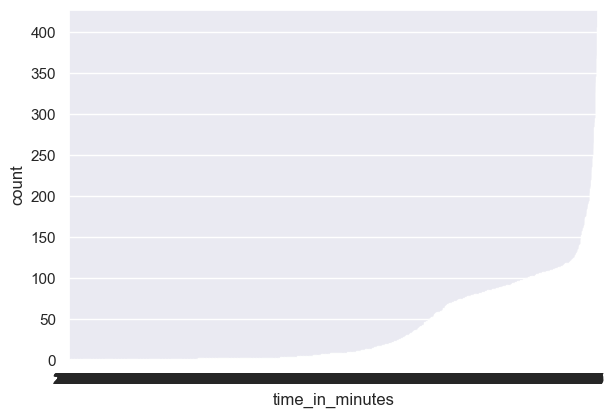

In [27]:
sns.set_theme(style='darkgrid',palette='pastel')
plt.figure(figsize=(15,10))

plt.subplot(222)
sns.countplot(x=Df["time_in_minutes"],order= Df['time_in_minutes'].value_counts().index[::-1])
plt.xlabel='Time'
plt.ylabel='count'
plt.title='Price according to Time'


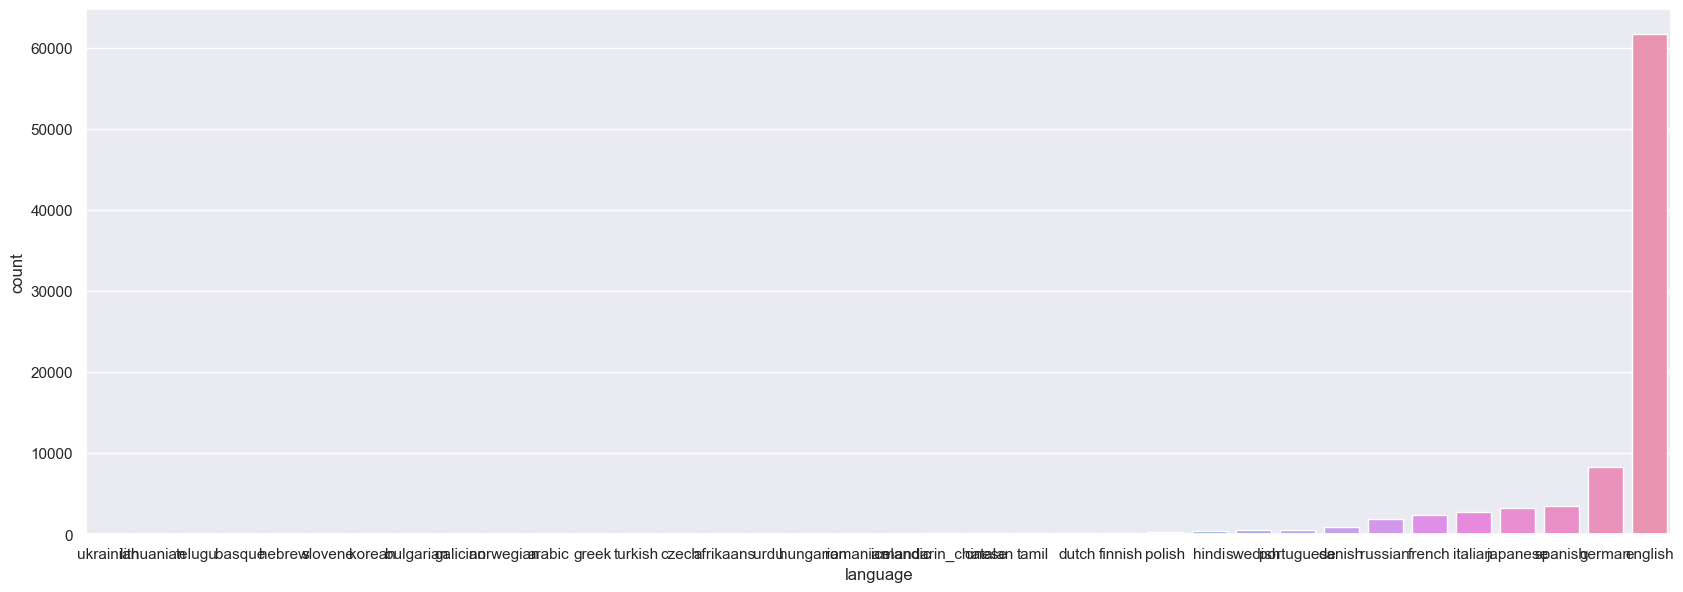

In [28]:
sns.set_theme(style='darkgrid',palette='pastel')
plt.figure(figsize=(45,15))

plt.subplot(223)
sns.countplot(x=Df["language"],order= Df['language'].value_counts().index[::-1])
plt.xlabel='Language'
plt.ylabel='count'
plt.title='Price according to Language'

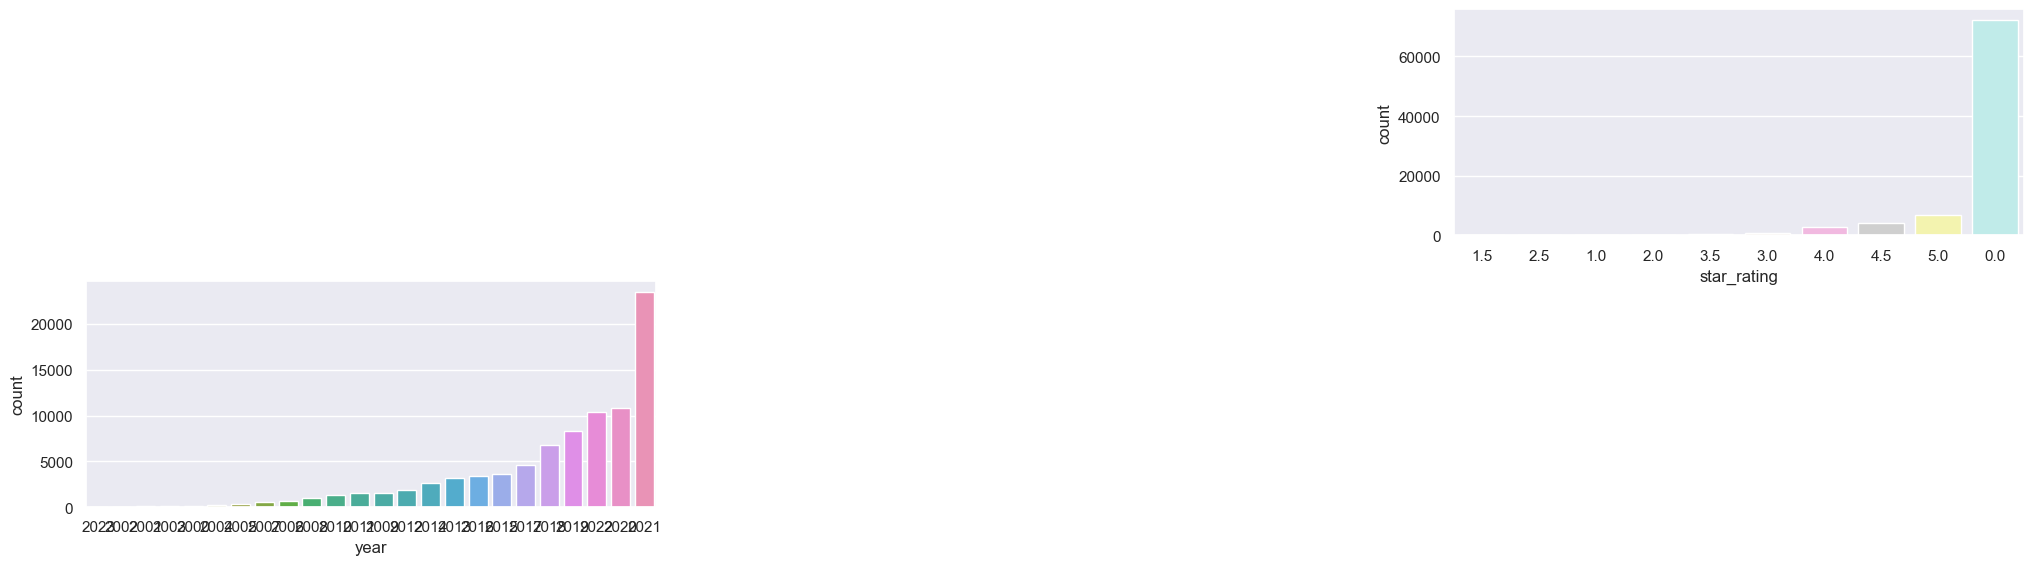

In [29]:
sns.set_theme(style='darkgrid',palette='pastel')
plt.figure(figsize=(25,10))

plt.subplot(336)
sns.countplot(x=Df["star_rating"],order= Df['star_rating'].value_counts().index[::-1])
plt.xlabel='Star'
plt.ylabel='count'
plt.title='Price according to Star'

plt.subplot(337)
sns.countplot(x=Df["year"],order= Df['year'].value_counts().index[::-1])
plt.xlabel='Year'
plt.ylabel='count'
plt.title='Price according to Year'

# Feature vs Target plot

In [30]:
language_order = Df.groupby('language')['price'].mean().reset_index().sort_values('price')['language']
star_order = Df.groupby('star_rating')['price'].mean().reset_index().sort_values('price')['star_rating']
year_order = Df.groupby('year')['price'].mean().reset_index().sort_values('price')['year']

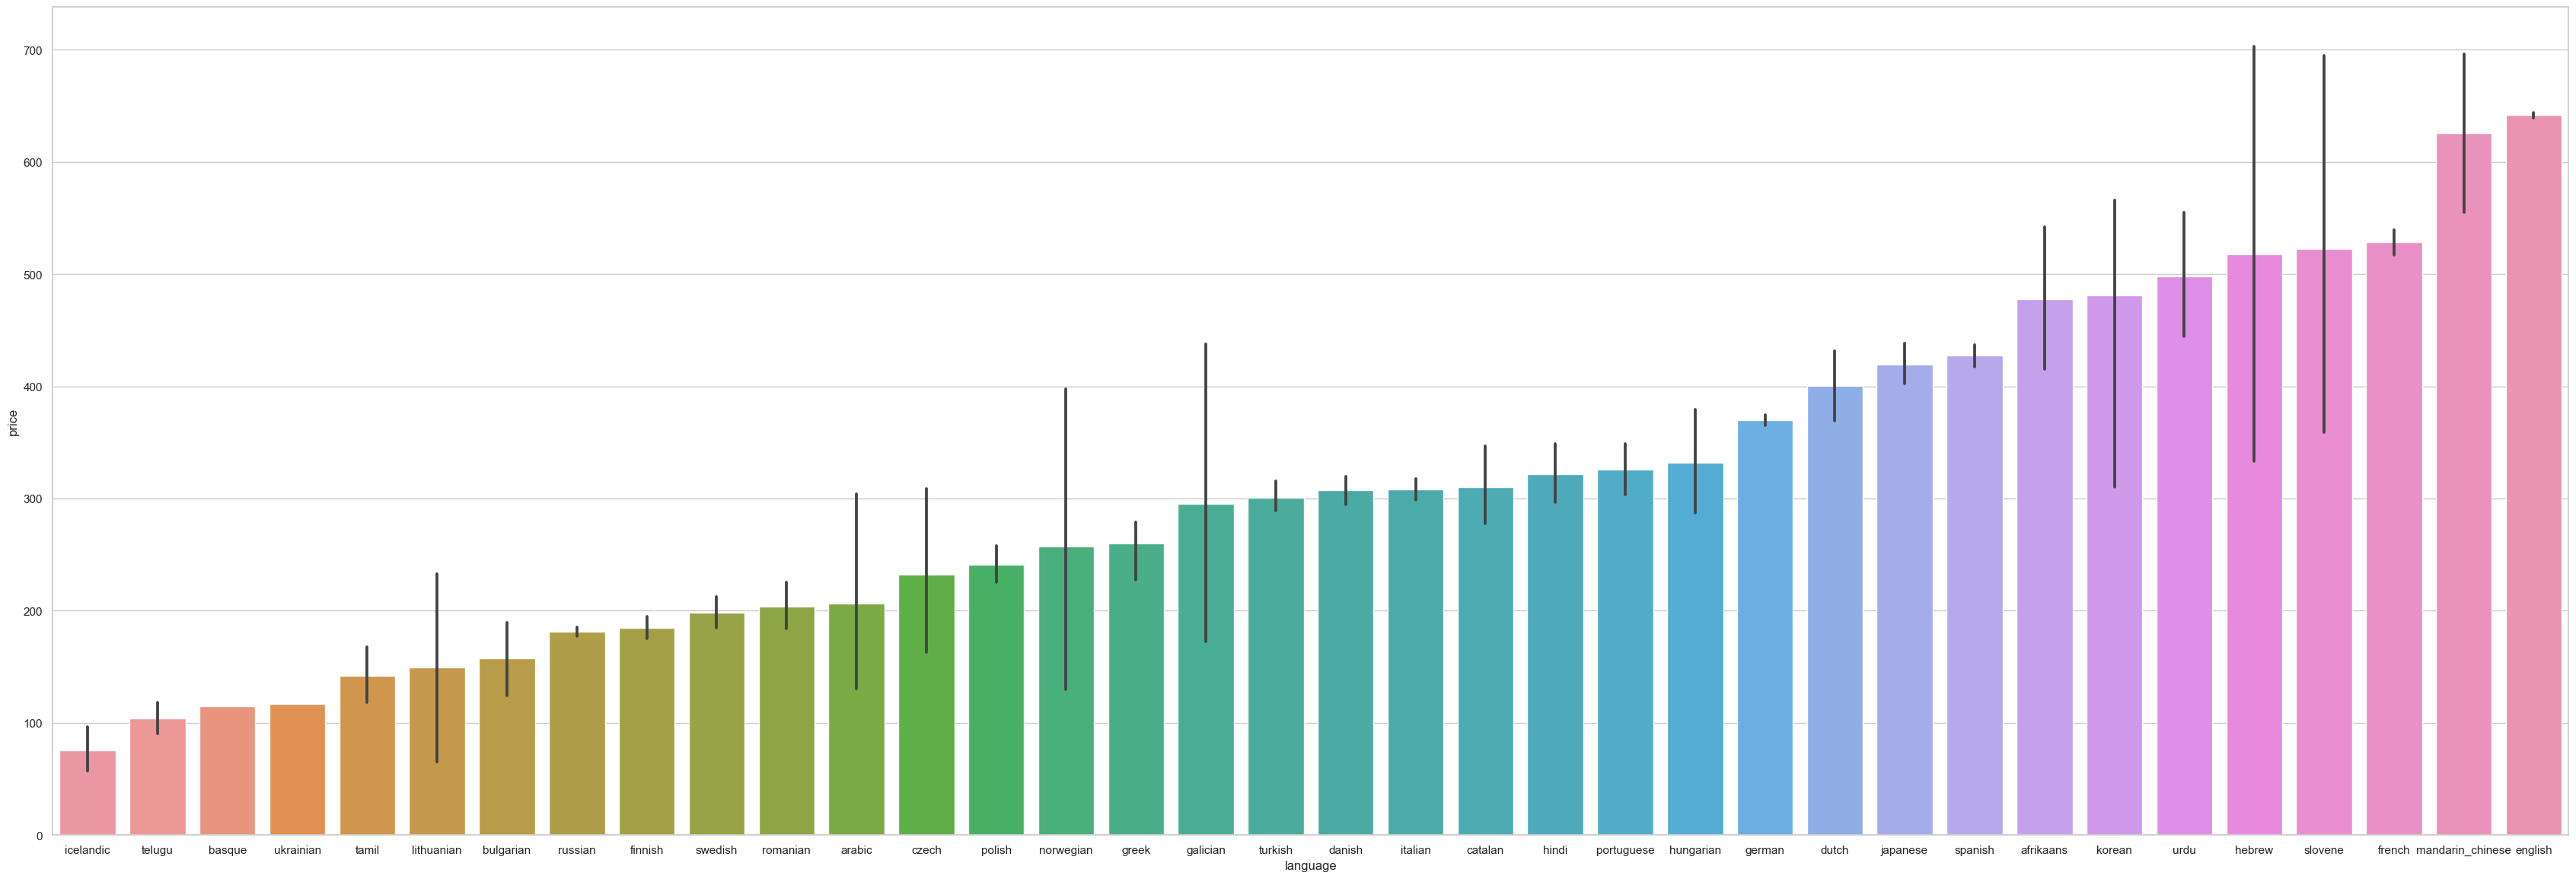

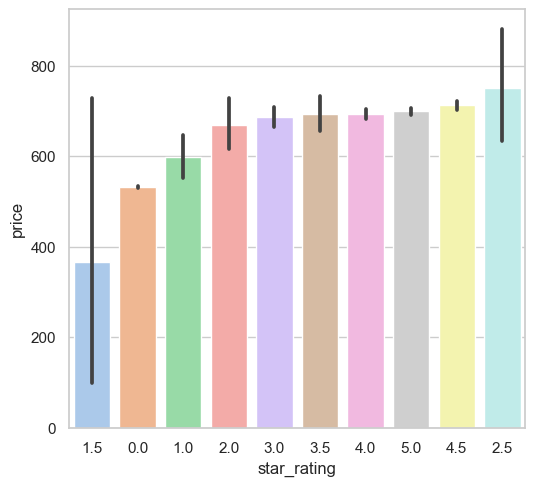

In [31]:
#For categoricals
sns.set_theme(style='whitegrid',palette='pastel')

plt.figure(figsize=(145,65))
plt.subplot(431)
sns.barplot(data=Df,x='language',y='price',order= language_order)
plt.show()

plt.figure(figsize=(20,25))
plt.subplot(432)
sns.barplot(data=Df,x='star_rating',y='price',order=star_order)
plt.show()


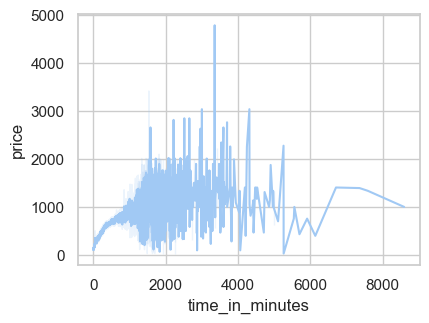

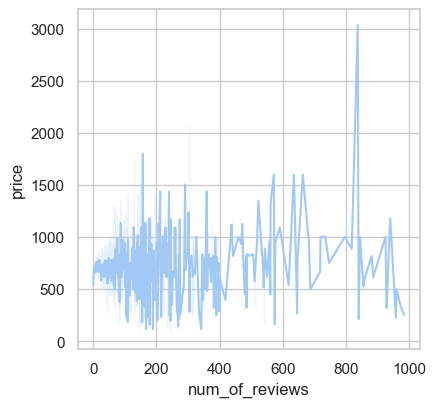

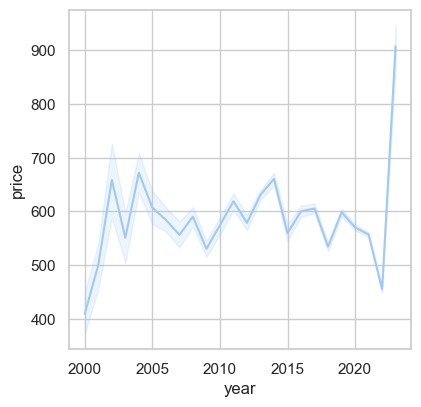

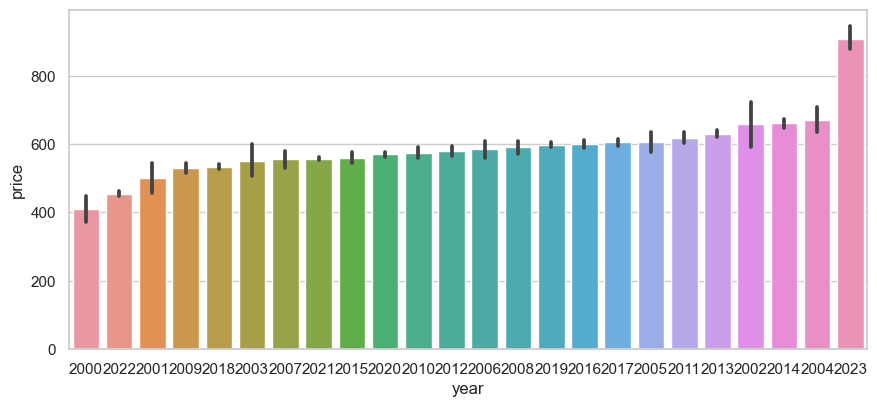

In [32]:
#For numericals
sns.set_theme(style='whitegrid',palette='pastel')
plt.figure(figsize=(15,15))
plt.subplot(432)
sns.lineplot(data=Df,x='time_in_minutes',y='price')
plt.show()

plt.figure(figsize=(15,15))
plt.subplot(332)
sns.lineplot(data=Df,x='num_of_reviews',y='price')
plt.show()

plt.figure(figsize=(15,15))
plt.subplot(333)
sns.lineplot(data=Df,x='year',y='price')
plt.show()

plt.figure(figsize=(35,15))
plt.subplot(334)
sns.barplot(data=Df,x='year',y='price',order=year_order)
plt.show()

# Preprocessing and Encoding

In [33]:
#Frequency encoding for Df['name']:

name_counts = Df['name'].value_counts()

sorted_name_counts = name_counts.sort_index()

name_encoding = dict(zip(sorted_name_counts.index,range(1,len(sorted_name_counts)+1)))

Df['name'] = Df['name'].map(name_encoding)

In [34]:
#Frequency encoding for Df['author']:

author_counts = Df['author'].value_counts()

sorted_author_counts = author_counts.sort_index()

author_encoding = dict(zip(sorted_author_counts.index,range(1,len(sorted_author_counts)+1)))

Df['author'] = Df['author'].map(author_encoding)

In [35]:
#Frequency encoding for Df['narrator']:

narrator_counts = Df['narrator'].value_counts()

sorted_narrator_counts = narrator_counts.sort_index()

narrator_encoding = dict(zip(sorted_narrator_counts.index,range(1,len(sorted_narrator_counts)+1)))

Df['narrator'] = Df['narrator'].map(narrator_encoding)

In [36]:
#Frequency encoding for Df['language']:

language_counts = Df['language'].value_counts()

sorted_language_counts = language_counts.sort_index()

language_encoding = dict(zip(sorted_language_counts.index,range(1,len(sorted_language_counts)+1)))

Df['language'] = Df['language'].map(language_encoding)
Df

,name,author,narrator,time_in_minutes,language,price,star_rating,num_of_reviews,year
0,24450,15904,3319,140,9,468.0,5.0,34,2008
1,58818,37790,23067,788,9,820.0,4.5,41,2018
2,60073,20241,6340,123,9,410.0,4.5,38,2020
3,14930,37790,25249,676,9,615.0,4.5,12,2021
4,63755,37790,12807,600,9,820.0,4.5,181,2010
...,...,...,...,...,...,...,...,...,...
87484,35367,7763,5007,454,9,596.0,0.0,0,2017
87485,57411,42142,23128,607,9,820.0,0.0,0,2017
87486,62845,29796,9106,1144,9,938.0,0.0,0,2016
87487,2779,26342,2289,248,9,680.0,0.0,0,2011


In [37]:
Df = Df.dropna(subset=['price'])

In [38]:
# Assuming 'Df' is your DataFrame
Df['price'] = Df['price'].astype(int)
Df

/var/folders/zh/hz8h6ds90610m49s0946tws40000gn/T/ipykernel_1048/3070599152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['price'] = Df['price'].astype(int)


,name,author,narrator,time_in_minutes,language,price,star_rating,num_of_reviews,year
0,24450,15904,3319,140,9,468,5.0,34,2008
1,58818,37790,23067,788,9,820,4.5,41,2018
2,60073,20241,6340,123,9,410,4.5,38,2020
3,14930,37790,25249,676,9,615,4.5,12,2021
4,63755,37790,12807,600,9,820,4.5,181,2010
...,...,...,...,...,...,...,...,...,...
87484,35367,7763,5007,454,9,596,0.0,0,2017
87485,57411,42142,23128,607,9,820,0.0,0,2017
87486,62845,29796,9106,1144,9,938,0.0,0,2016
87487,2779,26342,2289,248,9,680,0.0,0,2011


In [39]:
Df['star_rating'].value_counts()

0.0    72131
5.0     6658
4.5     3960
4.0     2672
3.0      693
3.5      393
2.0      180
1.0      172
2.5       44
1.5        6
Name: star_rating, dtype: int64

In [40]:
star_counts = Df['star_rating'].value_counts()
sorted_star_counts = star_counts.sort_index()
star_encoding = dict(zip(sorted_star_counts.index,range(1,len(sorted_star_counts)+1)))
Df['star_rating'] = Df['star_rating'].map(star_encoding)
Df

/var/folders/zh/hz8h6ds90610m49s0946tws40000gn/T/ipykernel_1048/3897048932.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['star_rating'] = Df['star_rating'].map(star_encoding)


,name,author,narrator,time_in_minutes,language,price,star_rating,num_of_reviews,year
0,24450,15904,3319,140,9,468,10,34,2008
1,58818,37790,23067,788,9,820,9,41,2018
2,60073,20241,6340,123,9,410,9,38,2020
3,14930,37790,25249,676,9,615,9,12,2021
4,63755,37790,12807,600,9,820,9,181,2010
...,...,...,...,...,...,...,...,...,...
87484,35367,7763,5007,454,9,596,1,0,2017
87485,57411,42142,23128,607,9,820,1,0,2017
87486,62845,29796,9106,1144,9,938,1,0,2016
87487,2779,26342,2289,248,9,680,1,0,2011


In [41]:
Df.head(10)

,name,author,narrator,time_in_minutes,language,price,star_rating,num_of_reviews,year
0,24450,15904,3319,140,9,468,10,34,2008
1,58818,37790,23067,788,9,820,9,41,2018
2,60073,20241,6340,123,9,410,9,38,2020
3,14930,37790,25249,676,9,615,9,12,2021
4,63755,37790,12807,600,9,820,9,181,2010
5,62662,42930,26409,635,9,656,10,72,2018
6,48172,46624,17052,143,9,233,10,11,2014
7,59903,37790,23067,752,9,820,10,50,2017
8,40351,30334,18352,656,9,1256,10,5,2017
9,69100,37790,23067,802,9,820,10,58,2019


# Splitting Data into Train and Test

In [42]:
X = Df.drop('price',axis=1)
y = Df['price']

In [43]:
X

,name,author,narrator,time_in_minutes,language,star_rating,num_of_reviews,year
0,24450,15904,3319,140,9,10,34,2008
1,58818,37790,23067,788,9,9,41,2018
2,60073,20241,6340,123,9,9,38,2020
3,14930,37790,25249,676,9,9,12,2021
4,63755,37790,12807,600,9,9,181,2010
...,...,...,...,...,...,...,...,...
87484,35367,7763,5007,454,9,1,0,2017
87485,57411,42142,23128,607,9,1,0,2017
87486,62845,29796,9106,1144,9,1,0,2016
87487,2779,26342,2289,248,9,1,0,2011


In [44]:
y

0        468
1        820
2        410
3        615
4        820
        ... 
87484    596
87485    820
87486    938
87487    680
87488    569
Name: price, Length: 86909, dtype: int64

In [45]:
#split the data into train and test in 8:2 ratio

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [46]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(69527, 8) (17382, 8) (69527,) (17382,)


In [47]:
X_train

,name,author,narrator,time_in_minutes,language,star_rating,num_of_reviews,year
15030,58015,32142,21888,447,9,1,0,2013
22350,34239,1975,13933,501,30,1,0,2021
54074,74273,16105,10092,69,19,1,0,2020
44147,2179,17003,9580,498,9,1,0,2020
73013,66973,25630,26029,630,9,10,0,2020
...,...,...,...,...,...,...,...,...
55772,48750,41380,22424,540,9,1,0,2020
59779,32871,31360,4859,496,9,1,0,2022
48772,14765,15227,17569,9,13,1,0,2022
22808,40252,19094,6567,637,11,1,0,2020


# Building Machine Learning Models 

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Linear Regression

In [49]:
linear_model = LinearRegression(fit_intercept=True) #Initialize
linear_model.fit(X_train,y_train) #fit
print(linear_model.predict(X_test)) #predict
print(y_test)

[367.77805872 604.3778079  265.44785529 ... 724.64481535 391.34086527
 573.92675207]
68951    267
27169    670
16115    139
83348    307
62627    468
        ... 
81250    501
34487    501
42580    703
52695    140
87413    434
Name: price, Length: 17382, dtype: int64


In [50]:
linear_model.score(X_test,y_test)

0.4153737319561619

In [51]:
from sklearn.model_selection import cross_val_score #import
cross_val_linear_model = cross_val_score(linear_model,X_train,y_train,cv=10).mean()
cross_val_linear_model

0.4281137414414685

# K N Neighbour Regression

In [52]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_values=np.arange(1,50)
cross_val_knn=[]
for k in knn_values:
    knn_regressor=KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train_scaled,y_train)
    print("K value : ", k, " train score : ", knn_regressor.score(X_train_scaled,y_train)  ,"cross_val_score : ", cross_val_score(knn_regressor,X_train_scaled,y_train,cv = 10).mean())
    cross_val_knn.append(cross_val_score(knn_regressor,X_train_scaled,y_train,cv = 10).mean())

K value :  1  train score :  0.9999701538390782 cross_val_score :  0.29009459138524746
K value :  2  train score :  0.8252077276461814 cross_val_score :  0.44949633535831046
K value :  3  train score :  0.7559328413066471 cross_val_score :  0.49935162200161337
K value :  4  train score :  0.7198966722732965 cross_val_score :  0.5230268190701992
K value :  5  train score :  0.6960935314784147 cross_val_score :  0.5371669735600151
K value :  6  train score :  0.6810547322709101 cross_val_score :  0.5454228779699873
K value :  7  train score :  0.6684784397378487 cross_val_score :  0.5525260824115703
K value :  8  train score :  0.6594397454513015 cross_val_score :  0.5575561333890233
K value :  9  train score :  0.6519640281058507 cross_val_score :  0.5603377141838978
K value :  10  train score :  0.6462014965018001 cross_val_score :  0.5618717886858531
K value :  11  train score :  0.640251921439238 cross_val_score :  0.5638563708057723
K value :  12  train score :  0.6358509223359226 c

In [53]:
cross_val_knn_regressor=max(cross_val_knn)

In [54]:
print("The best K-Value is 18 and Cross_val_score is",cross_val_knn_regressor )

The best K-Value is 18 and Cross_val_score is 0.5682026224096407


# Implementing K Nearest Neighbor Regression

In [55]:
knn_regressor=KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_scaled,y_train)

KNeighborsRegressor()

In [56]:
cross_val_knn_regressor=cross_val_score(knn_regressor,X_train_scaled,y_train,cv=15).mean()
cross_val_knn_regressor

0.5382772351570309

# Decision Tree Regression

In [57]:
max_depth=np.arange(1,20)
cross_val_dt=[]
for d in max_depth:
    dt_regressor= DecisionTreeRegressor(max_depth=d, random_state=0)
    dt_regressor.fit(X_train,y_train)
    print("Depth : ", d, " train Score  : ", dt_regressor.score(X_train,y_train), "cross_val_score : ", cross_val_score(dt_regressor,X_train,y_train,cv = 10).mean())
    cross_val_dt.append(cross_val_score(dt_regressor,X_train,y_train,cv = 10).mean())

Depth :  1  train Score  :  0.358606974385138 cross_val_score :  0.3583180948804165
Depth :  2  train Score  :  0.43692384627991576 cross_val_score :  0.4355185614505682
Depth :  3  train Score  :  0.49574353252004844 cross_val_score :  0.49437132325937466
Depth :  4  train Score  :  0.5363367088604616 cross_val_score :  0.5323572151086886
Depth :  5  train Score  :  0.5698977156643625 cross_val_score :  0.5566702029418978
Depth :  6  train Score  :  0.5924585381789979 cross_val_score :  0.5751593199287952
Depth :  7  train Score  :  0.6051557094896683 cross_val_score :  0.5730076656258947
Depth :  8  train Score  :  0.6218586708043793 cross_val_score :  0.5761418403134935
Depth :  9  train Score  :  0.6338182510982278 cross_val_score :  0.5874891024293231
Depth :  10  train Score  :  0.6481112653767336 cross_val_score :  0.5881142294837597
Depth :  11  train Score  :  0.6617717722083303 cross_val_score :  0.5864229871886122
Depth :  12  train Score  :  0.675340375612449 cross_val_scor

In [58]:
cross_val_dt_regressor=max(cross_val_dt)

In [59]:
print("The best depth is 10 and Cross_val_score is:",cross_val_dt_regressor)

The best depth is 10 and Cross_val_score is: 0.5881142294837597


# Implementing Decision Tree Regression

In [60]:
dt_regressor=DecisionTreeRegressor(max_depth=13, random_state=0)
dt_regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=13, random_state=0)

In [61]:
cross_val_dt_regressor=cross_val_score(dt_regressor,X_train,y_train,cv=10).mean()
cross_val_dt_regressor

0.5588967236894813

In [62]:
ftImp = list(zip(dt_regressor.feature_importances_, Df.columns[:-1]))
imp = pd.DataFrame(ftImp, columns = ["Importance","Feature"])
imp.sort_values("Importance",ascending = False,inplace=True)
imp

,Importance,Feature
3,0.719156,time_in_minutes
4,0.102647,language
1,0.070957,author
0,0.039436,name
2,0.036646,narrator
7,0.023411,num_of_reviews
6,0.005728,star_rating
5,0.002019,price


# Random Forest Regression

In [63]:
max_depth=np.array([2,4,8,10,11,12,13,15,18,20])
cross_val_rf=[]
for d in max_depth:
    rf_regressor=RandomForestRegressor(max_depth=d, random_state=0)
    rf_regressor.fit(X_train,y_train)
    print("Depth : ", d, "cross_val_score : ", cross_val_score(rf_regressor,X_train,y_train,cv = 15).mean())
    cross_val_rf.append(cross_val_score(rf_regressor,X_train,y_train,cv = 15).mean())

Depth :  2 cross_val_score :  0.4595710662218881
Depth :  4 cross_val_score :  0.5425147466588739
Depth :  8 cross_val_score :  0.6059486533477458
Depth :  10 cross_val_score :  0.6181988215456239
Depth :  11 cross_val_score :  0.6218466697477709
Depth :  12 cross_val_score :  0.6243393672411853
Depth :  13 cross_val_score :  0.6268543634589562
Depth :  15 cross_val_score :  0.6292541248442017
Depth :  18 cross_val_score :  0.6300193366555263
Depth :  20 cross_val_score :  0.630681651407451


In [81]:
cross_val_rf_regressor=max(cross_val_rf)

In [82]:
print("The best depth is 20 and Cross_val_score is:",cross_val_rf_regressor)

The best depth is 20 and Cross_val_score is: 0.630681651407451


# Extreme Gradient Boosting Regression

In [66]:
import xgboost as xgb

cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.1,0.2,0.25,0.3]:
    xgb_regressor= xgb.XGBRegressor(learning_rate = lr,n_estimators=100)
    xgb_regressor.fit(X_train,y_train)
    print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())
    cross_val_xgb.append(cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())

Learning rate :  0.01 cross_val_score: 0.5164485908481117
Learning rate :  0.05 cross_val_score: 0.6208380079583485
Learning rate :  0.08 cross_val_score: 0.6263531754776146
Learning rate :  0.1 cross_val_score: 0.6271613460861867
Learning rate :  0.2 cross_val_score: 0.6329155647664976
Learning rate :  0.25 cross_val_score: 0.6337838503315829
Learning rate :  0.3 cross_val_score: 0.6323472315764677


In [67]:
cross_val_xgb_regressor=max(cross_val_xgb)

In [68]:
print("The best Learning rate is 0.25 and Cross_val_score is:",cross_val_xgb_regressor)

The best Learning rate is 0.25 and Cross_val_score is: 0.6337838503315829


# Implementing Extreme Gradient Boosting Regression

In [69]:
xgb_regressor= xgb.XGBRegressor(learning_rate =0.1,n_estimators=100) # initialise the model
xgb_regressor.fit(X_train,y_train) #train the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [70]:
cross_val_xgb_regressor=cross_val_score(xgb_regressor,X_train,y_train,cv=15).mean()
cross_val_xgb_regressor

0.6271613460861867

# Cross-Validation Score for Machine-Learning Models

In [71]:
print("Cross Validation Score for Linear Regression Model:",cross_val_linear_model)
print("Cross Validation Score for K-Nearest Neighbors Regression Model:",cross_val_knn_regressor)
print("Cross Validation Score for Decision Tree Regression Model: ",cross_val_dt_regressor)
print("Cross Validation Score for Random Forest Regression Model: ",cross_val_rf_regressor)
print("Cross Validation Score for Extreme-Gradient Boosting Regression Model: ",cross_val_xgb_regressor)

Cross Validation Score for Linear Regression Model: 0.4281137414414685
Cross Validation Score for K-Nearest Neighbors Regression Model: 0.5382772351570309
Cross Validation Score for Decision Tree Regression Model:  0.5588967236894813
Cross Validation Score for Random Forest Regression Model:  0.630681651407451
Cross Validation Score for Extreme-Gradient Boosting Regression Model:  0.6271613460861867


# R2 Score for Machine-Learning Models

In [72]:
from sklearn.metrics import r2_score

In [73]:
y_pred_lr=linear_model.predict(X_test)
y_pred_knn=knn_regressor.predict(X_test)
y_pred_dt= dt_regressor.predict(X_test)
y_pred_rf=rf_regressor.predict(X_test)
y_pred_xgb=xgb_regressor.predict(X_test)

/Users/joesnowafc/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


In [74]:
R2_score_lr=r2_score(y_test,y_pred_lr)
R2_score_knn=r2_score(y_test,y_pred_knn)
R2_score_dt=r2_score(y_test,y_pred_dt)
R2_score_rf=r2_score(y_test,y_pred_rf)
R2_score_xgb=r2_score(y_test,y_pred_xgb)

In [75]:
print("R2 Score for Linear Regression Model:",R2_score_lr)
print("R2 Score for K-Nearest Neighbors Regression Model:",R2_score_knn)
print("R2 Score for Decision Tree Regression Model: ",R2_score_dt)
print("R2 Score for Random Forest Regression Model: ",R2_score_rf)
print("R2 Score for Extreme-Gradient Boosting Regression Model: ",R2_score_xgb)

R2 Score for Linear Regression Model: 0.4153737319561619
R2 Score for K-Nearest Neighbors Regression Model: -4.143738956920434
R2 Score for Decision Tree Regression Model:  0.5883508320210726
R2 Score for Random Forest Regression Model:  0.6511719326923662
R2 Score for Extreme-Gradient Boosting Regression Model:  0.6415564735685358


# Important Features 


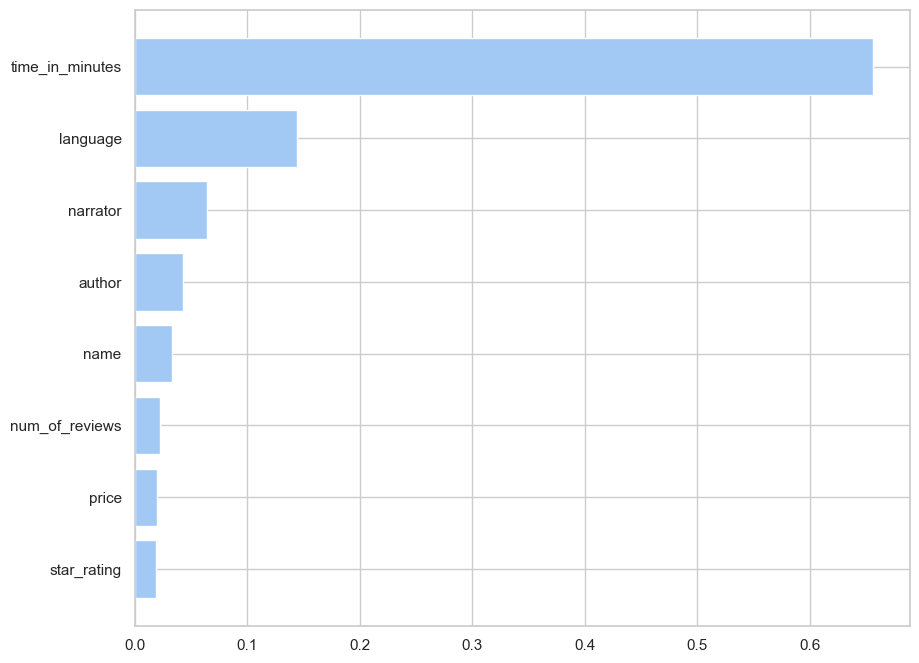

In [76]:
sorted_idx = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,8))
plt.barh(Df.columns[sorted_idx], xgb_regressor.feature_importances_[sorted_idx])
# plt.xlabel("Random Forest Feature Importance")
# plt.title("Feature Importance")
plt.show()

In [77]:
Df['time_in_minutes'].value_counts().head(15)

1     406
2     369
6     368
5     366
7     354
4     347
18    327
3     326
17    318
8     289
19    286
20    284
22    282
10    279
30    266
Name: time_in_minutes, dtype: int64

In [78]:
Df.narrator.value_counts().head(10)

2181     1194
18384     874
11333     465
27588     324
26257     311
3529      260
7205      230
7219      221
3290      198
24631     173
Name: narrator, dtype: int64

In [79]:
Df.author.value_counts().head(10)

30402    874
41461    405
43216    311
11344    274
34385    212
5010     198
46517    196
18577    174
15920    160
18131    135
Name: author, dtype: int64

# Conclusion :

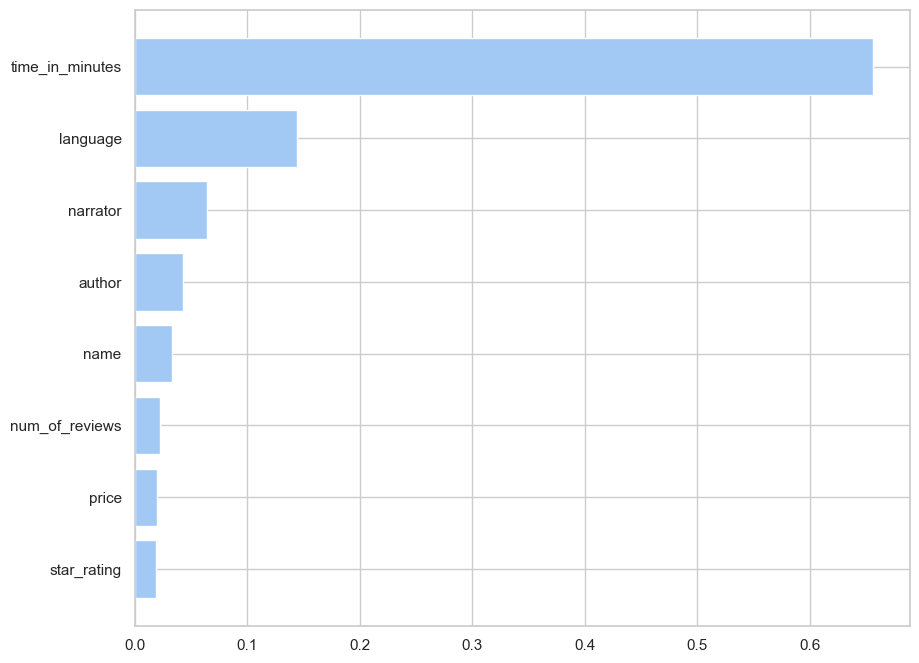

In [80]:
sorted_idx = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,8))
plt.barh(Df.columns[sorted_idx], xgb_regressor.feature_importances_[sorted_idx])
# plt.xlabel("Random Forest Feature Importance")
# plt.title("Feature Importance")
plt.show()